In [1]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


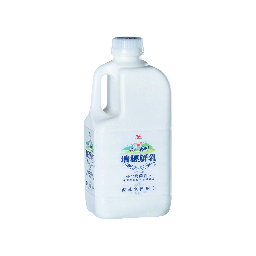

[[2.8087586e-06 6.3918516e-05 1.9804252e-06 1.9800749e-03 2.0109765e-05
  9.8803419e-01 4.5057252e-05 9.8477127e-03 4.1389912e-06]]
LargeReiSuiMilk


In [ ]:
def image(pic_path):
  # 要預測的圖片
  pic = cv2.imread(pic_path)
  pic = cv2.resize(pic, (256, 256))
  cv2_imshow(pic)  # function for colab
  pic = np.array(pic)
  pic_array = []
  pic_array.append(pic)
  pic_array = np.asarray(pic_array)
  return pic_array
    
def predict(pic_path):
  # 接收照片進行預測
  pic = image(pic_path)

  # 載入訓練好的model
  model_pred = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/model_0822.h5')
  
  # Prediction
  pred = model_pred.predict(pic)
  print(pred)

  brand = {'iMeiMilk': 0, 'LimFengInMilk': 1, 'JuHsiangMilk': 2, 'FreshDelightMilk': 3, 'KuangChuanMilk': 4, 
        'LargeReiSuiMilk': 5, 'SmallReiSuiMilk': 6, 'LowFatLargeReiSuiMilk': 7, 'LowFatSmallReiSuiMilk': 8}

  out = np.argmax(pred, axis=1)
  for i in brand:
    if out == brand[i]:
      print(i)


img = "/content/drive/MyDrive/Colab_Notebooks/test_pic/RS_large.jpg"
predict(img)